
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix

In [2]:
df = pd.read_csv('titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
np.sum(df.isnull(),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


/home/varunc/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/varunc/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/varunc/env/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/varunc/env/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning

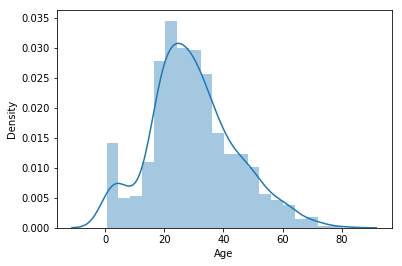

In [7]:
sns.distplot(df.Age);

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

/home/varunc/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/varunc/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/varunc/env/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/varunc/env/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning

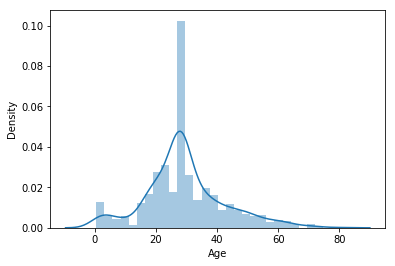

In [9]:
sns.distplot(df.Age);

In [10]:
df = df.dropna()

In [11]:
df['Sex'][df['Sex'] == 'male'] = 1
df['Sex'][df['Sex'] == 'female'] = 0
df['Sex'] = df['Sex'].astype(np.bool)

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/varunc/env/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,True,22.0,1,0,7.2500,S
1,1,1,False,38.0,1,0,71.2833,C
2,1,3,False,26.0,0,0,7.9250,S
3,1,1,False,35.0,1,0,53.1000,S
4,0,3,True,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,True,27.0,0,0,13.0000,S
887,1,1,False,19.0,0,0,30.0000,S
888,0,3,False,28.0,1,2,23.4500,S
889,1,1,True,26.0,0,0,30.0000,C


In [13]:
df['em_s'] = (df['Embarked'] == 'S')
df['em_c'] = (df['Embarked'] == 'C')
df['em_q'] = (df['Embarked'] == 'Q')

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [14]:
df = df.drop('Embarked',axis=1)

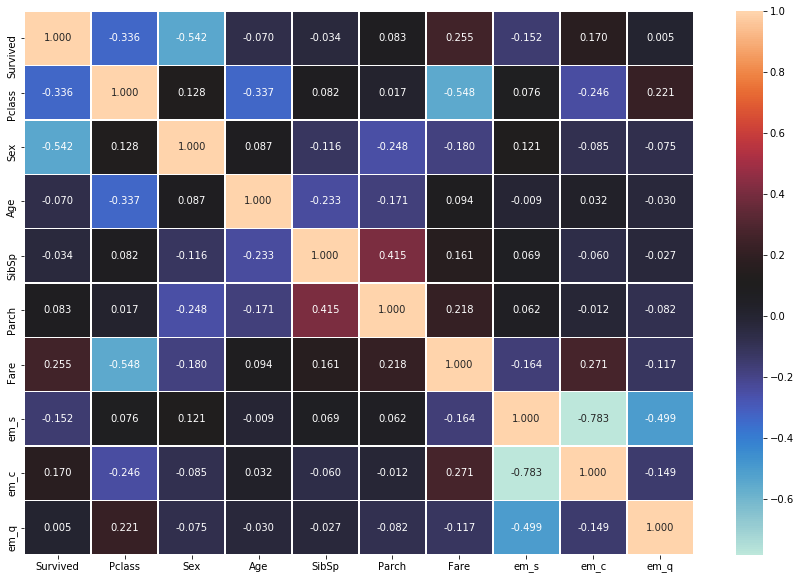

In [15]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f",cmap="icefire")

In [29]:
X = df[['Pclass','Age','SibSp','Parch','Fare','em_s','em_c','em_q']].to_numpy()
y = df['Survived'].to_numpy()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 8), (267, 8), (622,), (267,))

In [35]:
sigmoid = lambda x: 1/(1+np.exp(-x))
class LogisticReg():
    def __init__(self):
        pass
    def train(self,X,y,step_size=0.001,iters=5,batch_size=10):
        self.weights = np.random.randn(X.shape[1])
        #self.weights = np.zeros(X.shape[1])
        self.bias = np.random.randn()
        self.step_size = step_size
        pbar = tqdm(total = iters)
        for iter_n in range(iters):
            loss = 0
            for idx,x in enumerate(X):
                curr = sigmoid(self.weights@x + self.bias)
                loss += (curr - y[idx])
                if (idx+1) == X.shape[0] or (idx+1)%batch_size == 0:
                    loss = loss/batch_size
                    self.weights = self.weights - self.step_size*(loss*x)
                    self.bias = self.bias - self.step_size*loss
                    loss = 0
            pbar.update(1)
        pbar.close()
    def predict(self,X):
        y = np.zeros(X.shape[0])
        for idx,x in enumerate(X):
            y[idx] = sigmoid(self.weights@x + self.bias)
        return y

In [59]:
regressor = LogisticReg()

In [60]:
regressor.train(X_train,y_train,step_size=0.005,iters=5000, batch_size= 1)

In [61]:
preds = 1.0*(regressor.predict(X_test) > 0.5)

In [62]:
print('Accuracy:',accuracy_score(y_test,preds))
print('R squared:',r2_score(y_test,preds))
print('F1 Score:',f1_score(y_test,preds,average='micro'))
plt.show()

Accuracy: 0.700374531835206
R squared: -0.27904191616766494
F1 Score: 0.700374531835206


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    bool   
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   em_s      889 non-null    bool   
 8   em_c      889 non-null    bool   
 9   em_q      889 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 52.1 KB
